# ARNAV BATLA
## THE SPARKS FOUNDATION
### Data Science and Business Analytics Internship


### Task 1 : Prediction using Supervised ML
#### 1) Predict the percentage of a student based on the no. of study hours.
#### 2) What will be predicted score if a student studies for 9.25 hrs/ day?¶


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#### Importing the dataset

In [2]:
df = pd.read_csv('task1_data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Data Visualization

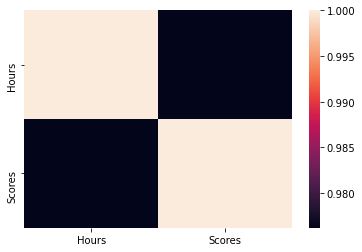

In [6]:
corr = df.corr()
sns.heatmap(corr)
plt.show()

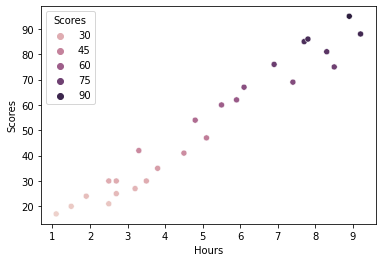

In [7]:
sns.scatterplot(x = 'Hours', y = 'Scores', data = df, hue = 'Scores')
plt.show()

#### Dividing data into features and labels

In [8]:
X = df.iloc[:, :-1].values    
y = df.iloc[:, 1].values

In [9]:
#Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [10]:
#Training the linear regression model
regressor = LinearRegression()    
regressor.fit(X_train, y_train)   

LinearRegression()

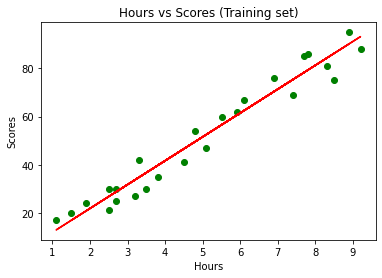

In [11]:
line = regressor.coef_*X+regressor.intercept_  
plt.scatter(X, y,color='green')  
plt.plot(X, line,color='red')
plt.title('Hours vs Scores (Training set)')

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

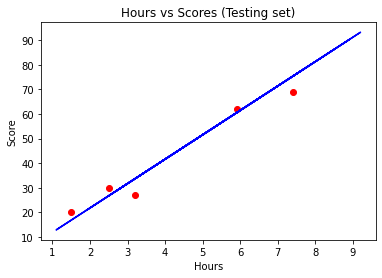

In [12]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Testing set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [13]:
y_pred = regressor.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#Predicting the result
prediction=regressor.predict([[9.5]])
prediction

array([96.16939661])

In [15]:
h=9.25
a=regressor.predict([[h]])
print('If student studies for {} hours per day he/she is likely to score {}%'.format(h,*a))

If student studies for 9.25 hours per day he/she is likely to score 93.69173248737538%


In [16]:
# Checking the r2 score and mean absolute error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [17]:
#Checking the accuracy of model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356